Precios de Spy y JP Morgan

In [1]:
!pip install yfinance
!pip  install seaborn


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: C:\Users\ediso\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: C:\Users\ediso\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import yfinance as yf
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
tickers = ['SPY','JPM']

data = pd.DataFrame()
for t in tickers:
     data[t]=tickers_data=yf.download(t, start="1993-01-29", progress=False)['Adj Close']
  
display(data) 

,SPY,JPM
Date,,
1993-01-29,25.029383,5.512949
1993-02-01,25.207386,5.563838
1993-02-02,25.260799,5.580801
1993-02-03,25.527824,5.648652
1993-02-04,25.634630,5.716504
...,...,...
2023-08-30,451.010010,148.160004
2023-08-31,450.350006,146.330002
2023-09-01,451.190002,146.820007


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7706 entries, 1993-01-29 to 2023-09-06
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPY     7706 non-null   float64
 1   JPM     7706 non-null   float64
dtypes: float64(2)
memory usage: 180.6 KB


<Figure size 1000x500 with 0 Axes>

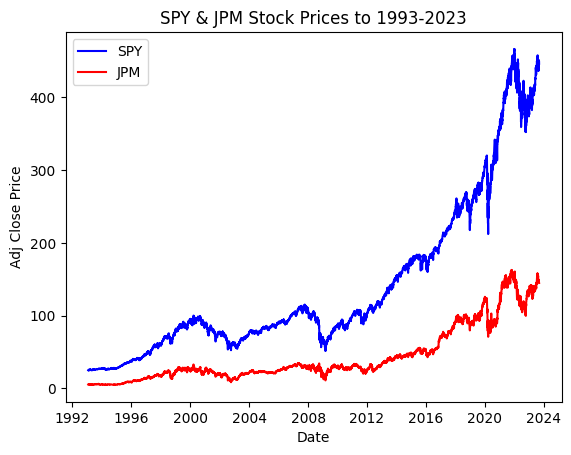

In [14]:
plt.figure(figsize=(10, 5))
fig, ax = plt.subplots()
ax.plot(data.index,data.SPY,color='blue',label="SPY")
ax.plot(data.index,data.JPM,color="red",label="JPM")
plt.title("SPY & JPM Stock Prices to 1993-2023")
plt.xlabel("Date")
plt.ylabel("Adj Close Price")
plt.legend()
plt.show()

In [27]:
display(log_returns)

,SPY,JPM
Date,,
1993-01-29,NaN,NaN
1993-02-01,0.007088,0.009189
1993-02-02,0.002116,0.003044
1993-02-03,0.010515,0.012085
1993-02-04,0.004175,0.011941
...,...,...
2023-08-30,0.004110,-0.004041
2023-08-31,-0.001464,-0.012428
2023-09-01,0.001863,0.003343


In [46]:
def medidas(data):
    data=pd.DataFrame({'Media': round(log_returns.mean()*252,2),"Varianza":round(log_returns.var()*252,2)})
    return data

In [47]:
medidas(log_returns)

,Media,Varianza
SPY,0.09,0.04
JPM,0.11,0.13


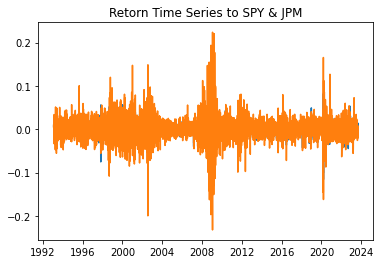

<Axes: >

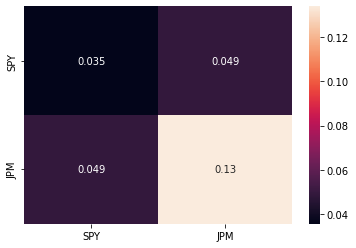

In [32]:
log_returns = np.log(1 + data.pct_change())
cov=log_returns.cov()*252
fig, ax =plt.subplots()
ax.plot(log_returns.index,log_returns.values)
plt.title("Retorn Time Series to SPY & JPM")
plt.show()
sns.heatmap(cov,linecolor="white",robust=False,fmt=".2g",annot=True)

Falta escribir las respuestas